In [576]:
# Initialize notebook: imports and plot style config
%run ../../init.py

Current time: 2020-04-03 12:04:25.594237


In [577]:
# source and format dataset
projdir = './'
subdir = 'data/'
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
data = pd.read_csv(url)
data = data.rename(columns={
    'Date': 'date',
    'Country/Region': 'location',
    'Province/State': 'region',
    'Confirmed': 'cases',
    'Recovered': 'recovered',
    'Deaths': 'deaths',
})
data['date'] = data['date'].map(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))

# format region naming
def format_region(row):
    if row['region'] is np.nan:
        return row['location']
    else:
        return row['region']
data['region'] = data.apply(format_region, axis=1)

# add differential columns
for col in ['cases', 'recovered', 'deaths']:
    data['new_'+col] = data[col].diff()
    
# add missing overall data for country
for country in data[data.region!=data.location].location.unique():
    if (country in data[data.location==country].region.unique())==False:
        df = data[data.location==country].groupby(['location', 'date'],as_index=False).sum()
        df['region'] = country
        data = data.append(df, ignore_index=True)
        
# relative increment (averaged over 1, 2, 3, 4 days)
for var in ['cases', 'deaths', 'recovered']: 
    for dayspan in [1,2,3,4]:
        colname = var+'_delta'+str(dayspan)
        data[colname] = 0
        for i in np.arange(dayspan):
            data[colname] = data[colname] + data['new_'+var].shift(i)/data[var].shift(i+1)
        data[colname] = data[colname]/dayspan

data = data[['date','region','cases','new_cases','deaths','new_deaths','recovered','new_recovered',
             'cases_delta1','cases_delta2','cases_delta3','cases_delta4',
             'deaths_delta1','deaths_delta2','deaths_delta3','deaths_delta4',
             'recovered_delta1','recovered_delta2','recovered_delta3','recovered_delta4',
            ]]
        
# last update time
lastday = pd.to_datetime(str(data.date.unique()[-1]))
print('\n Last updated data on:', lastday)

# print available countries
print('\n Available Countries', data.region.unique())

data[data.date==lastday].sort_values('cases', ascending=False).head(15)


 Last updated data on: 2020-04-02 00:00:00

 Available Countries ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Alberta' 'British Columbia' 'Diamond Princess' 'Grand Princess'
 'Manitoba' 'New Brunswick' 'Newfoundland and Labrador'
 'Northwest Territories' 'Nova Scotia' 'Ontario' 'Prince Edward Island'
 'Quebec' 'Recovery aggregated' 'Saskatchewan' 'Yukon'
 'Central African Republic' 'Chad' 'Chile' 'Anhui' 'Beijing' 'Chongqing'
 'Fujian' 'Gansu' 'Guangdong' 'Guangxi' 'Guizhou' 'Hainan' 'Hebei'
 'Heilongjiang' 'Henan' 'Hong Kong' 'Hube

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,date,region,cases,new_cases,deaths,new_deaths,recovered,new_recovered,cases_delta1,cases_delta2,cases_delta3,cases_delta4,deaths_delta1,deaths_delta2,deaths_delta3,deaths_delta4,recovered_delta1,recovered_delta2,recovered_delta3,recovered_delta4
17135,2020-04-02,US,243453.0,30081.0,5926.0,1169.0,9001.0,527.0,0.140979,0.137450,0.145947,0.146584,0.245743,0.236995,0.258176,0.245415,0.062190,0.134313,0.171044,0.407739
10727,2020-04-02,Italy,115242.0,4668.0,13915.0,760.0,18278.0,1431.0,0.042216,0.043709,0.042418,0.042178,0.057773,0.058135,0.062827,0.065953,0.084941,0.078010,0.077292,0.088475
16055,2020-04-02,Spain,112065.0,7947.0,10348.0,961.0,26743.0,4096.0,0.076327,0.080880,0.084113,0.087570,0.102376,0.105713,0.102789,0.110643,0.180863,0.178390,0.168172,0.161329
9359,2020-04-02,Germany,84794.0,6922.0,1107.0,187.0,22440.0,3740.0,0.088889,0.086668,0.082314,0.081020,0.203261,0.195179,0.197303,0.200510,0.200000,0.180745,0.184694,0.254931
18791,2020-04-02,China,82432.0,71.0,3322.0,6.0,76565.0,160.0,0.000862,0.000929,0.000948,0.000942,0.001809,0.001962,0.001409,0.001359,0.002094,0.002353,0.002811,0.003236
5111,2020-04-02,Hubei,67802.0,0.0,3199.0,6.0,63471.0,145.0,0.000000,0.000007,0.000005,0.000004,0.001879,0.001881,0.001359,0.001333,0.002290,0.002515,0.003076,0.003581
8423,2020-04-02,France,59105.0,2116.0,5387.0,1355.0,12428.0,1494.0,0.037130,0.065191,0.100161,0.102352,0.336062,0.240270,0.215185,0.201488,0.136638,0.147205,0.161927,0.146612
10439,2020-04-02,Iran,50468.0,2875.0,3160.0,124.0,16711.0,1238.0,0.060408,0.063698,0.067448,0.071378,0.040843,0.044231,0.046535,0.045981,0.080010,0.067878,0.063103,0.077995
17423,2020-04-02,United Kingdom,33718.0,4244.0,2921.0,569.0,135.0,0.0,0.143991,0.157960,0.150607,0.146494,0.241922,0.278311,0.275740,0.243450,0.000000,0.000000,0.000000,0.000000
16415,2020-04-02,Switzerland,18827.0,1059.0,536.0,48.0,4013.0,1046.0,0.059602,0.064820,0.057512,0.061561,0.098361,0.112691,0.143837,0.157044,0.352545,0.490041,0.326694,0.280757


In [578]:
# dictionary of population
population = {
    'Hubei': 56e6,
    'Korea, South': 54.5e6,
    'Japan': 127e6,
    'Iran': 81e6,
    'Australia': 24.6e6,
    'US': 327e6,
    'Switzerland': 8.5e6,
    'Austria': 8.8e6,
    'Germany': 82.7e6,
    'France': 67e6,
    'United Kingdom': 66.5e6,
    'Spain': 46.6e6,
    'San Marino': 33.7e3,
    'Italy': 60e6,
}

# dictionary of lockdown dates
lockdown = {
    'Italy': datetime.date(2020,3,11),
    'Hubei': datetime.date(2020,1,25),
    'Iran': datetime.date(2020,3,15),
    'Spain': datetime.date(2020,3,14),
    'United Kingdom': datetime.date(2020,3,25),
    'Austria': datetime.date(2020,3,16),
}

# dictionary of colors
color = {
    'Hubei': 'r',
    'Korea, South': 'purple',
    'Japan': 'grey',
    'Iran': 'limegreen',
    'Australia': 'royalblue',
    'US': 'hotpink',
    'Switzerland': 'brown',
    'Austria': 'pink',
    'Germany': 'black',
    'France': 'blue',
    'United Kingdom': 'g',
    'Spain': 'orange',
    'San Marino': 'paleturquoise',
    'Italy': 'dodgerblue',
}

In [579]:
# Utility functions

def rate(df, var, dayspan=3):
    k=[]
    for i in np.arange(dayspan):
        k.append(df['new_'+var].iat[-1-i]/df[var].iat[-1-i])
    return np.mean(k)*100

def format_dateaxis():
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()

def lockdown_lines():
    for state in lockdown.keys():
        ax.vlines(lockdown[state],-1000,1000, color=color[state], linestyle='--', linewidth=2, alpha=0.75)

def sorted_states(states, var, popnorm=False):
    df = data[data.region.isin(states)][data.date==lastday].sort_values(var, ascending=False)
    states = df.region.unique()
    return states

def leglabels_style():
    leg._legend_box.align = "left"
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())

def plot_total(var,lw=3):
    for state in states:
        df = data[data.region==state]
        pop = population[state]
        tot = df[var].iat[-1] # total value at current date
        new = df['new_'+var].iat[-1]
        k = rate(df, var)
        label = state + '\nTotal: %.f (+%.f)\n1 over %.f\nDaily increase: +%.1f%s' % (tot, new, pop/tot, k, '%')
        if var=='deaths': 
            mortality = tot/df['cases'].iat[-1]*100
            label = label + '\nMortality: %.1f%s' % (mortality, '%')
        ax.plot(df.date, df[var]/pop*1e5, label=label, color=color[state], lw=lw)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


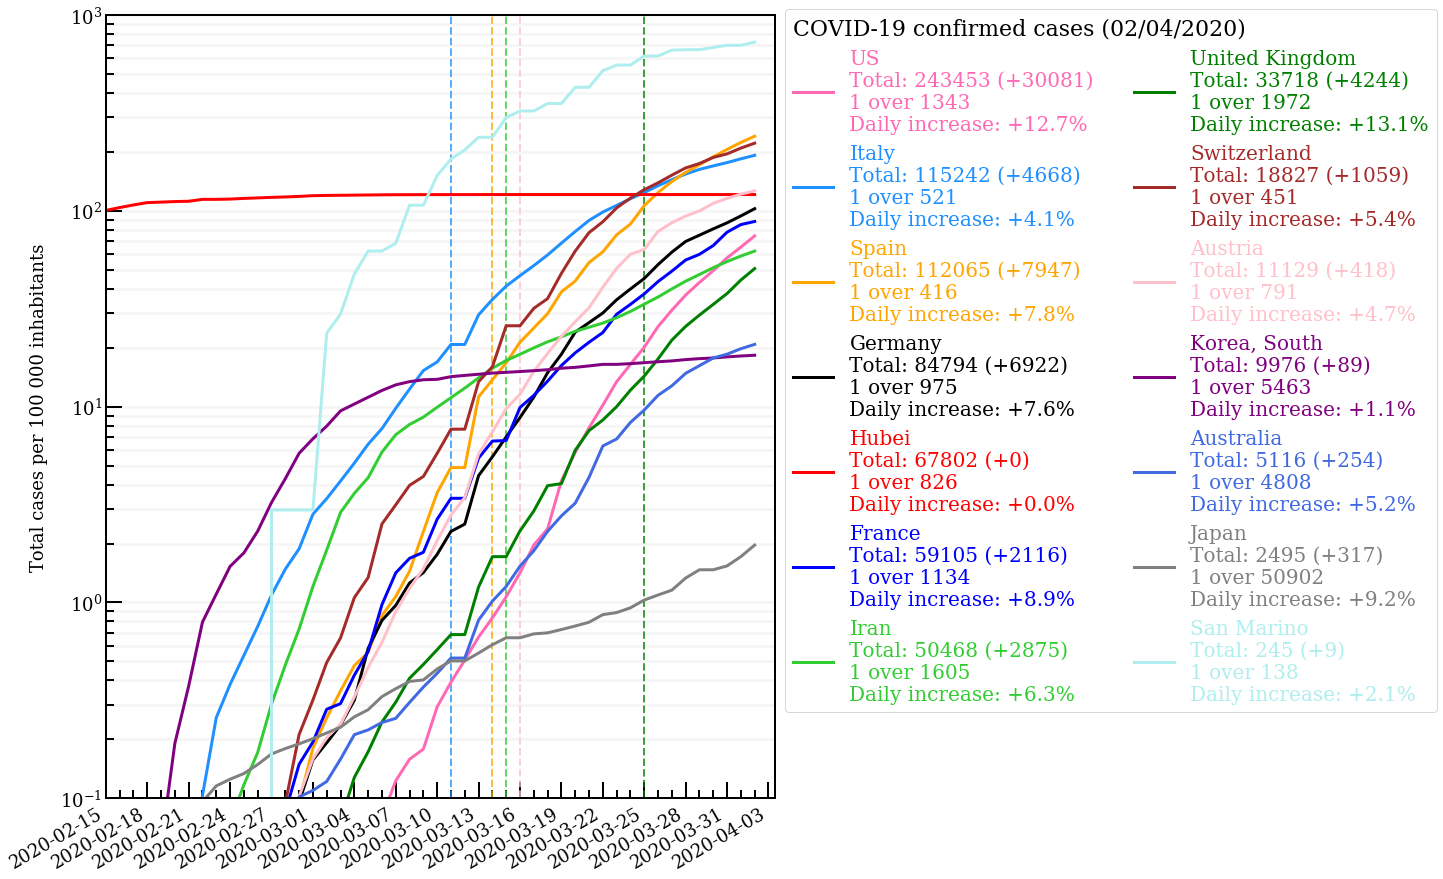

In [580]:
var = 'cases' # selected variable
states = population.keys() # selected states

fig = plt.figure(figsize=(12,16))
ax = fig.add_subplot(111)

#lockdown lines
lockdown_lines()

# sort by most cases
states = sorted_states(states, var)

# plot curves
plot_total(var)

# axes
format_dateaxis()
ax.set_xlim([datetime.datetime(2020, 2, 15), today+timedelta(days=0)])
ax.set_ylim(1e-1,1e3)
plt.ylabel('Total ' + var + ' per 100 000 inhabitants')
plt.yscale('log')
plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = plt.legend(loc='upper left', ncol=2, fontsize=20, title_fontsize=22, bbox_to_anchor=(1,1.02), title='COVID-19 confirmed cases (%s)' % lastday.strftime('%d/%m/%Y'))
leglabels_style()

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


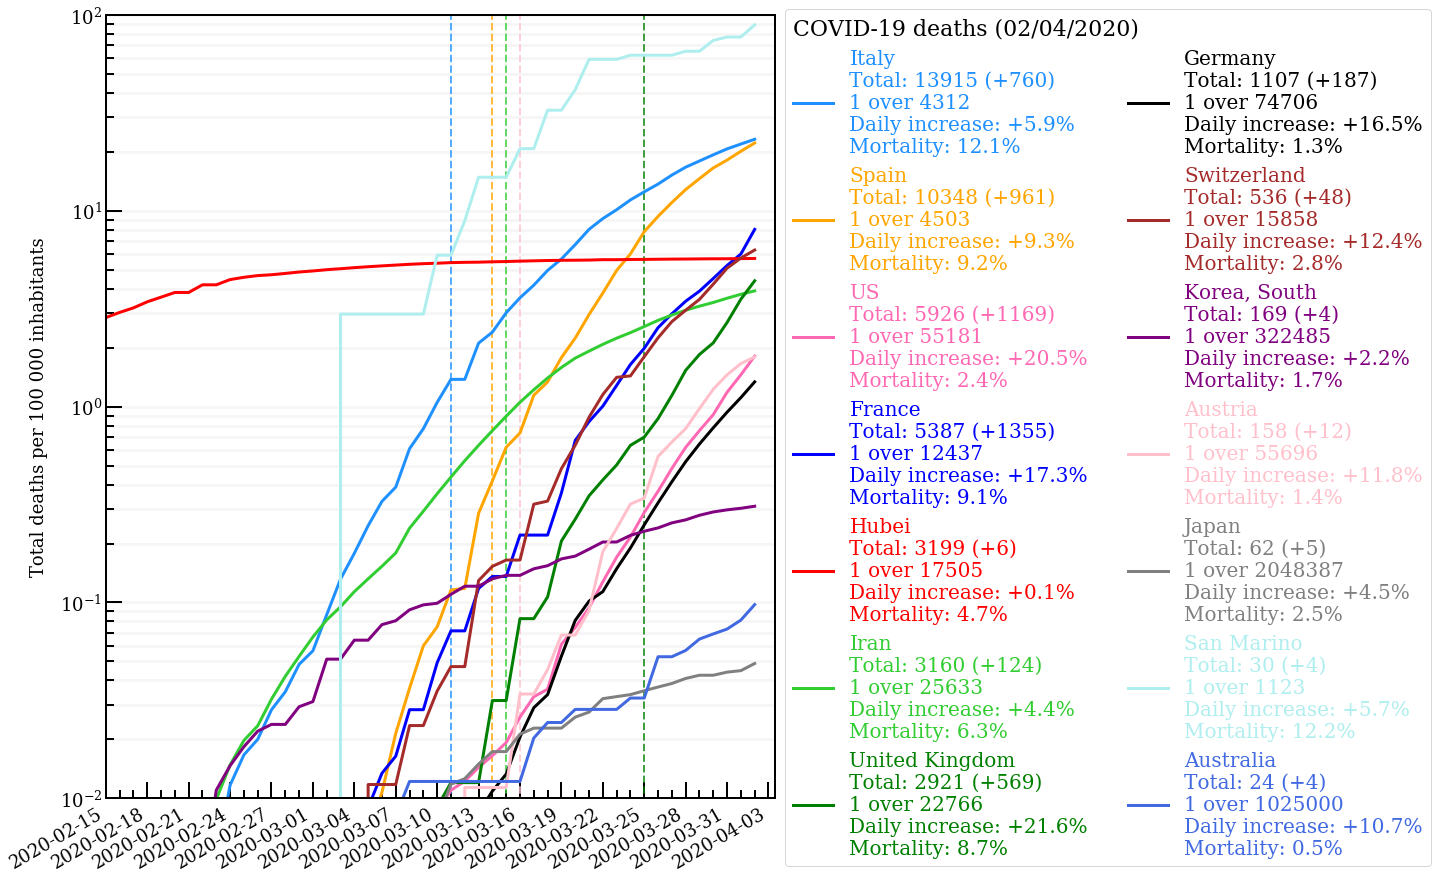

In [581]:
var = 'deaths'

fig = plt.figure(figsize=(12,16))
ax = fig.add_subplot(111)

#lockdown lines
lockdown_lines()

# sort by most cases
states = sorted_states(states, var)

# plot curves
plot_total(var)

# axes
format_dateaxis()
ax.set_xlim([datetime.datetime(2020, 2, 15), today+timedelta(days=0)])
ax.set_ylim(1e-2,1e2)
plt.ylabel('Total ' + var + ' per 100 000 inhabitants')
plt.yscale('log')
plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = plt.legend(loc='upper left', ncol=2, fontsize=20, title_fontsize=22, bbox_to_anchor=(1,1.02), title='COVID-19 deaths (%s)' % lastday.strftime('%d/%m/%Y'))
leglabels_style()

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


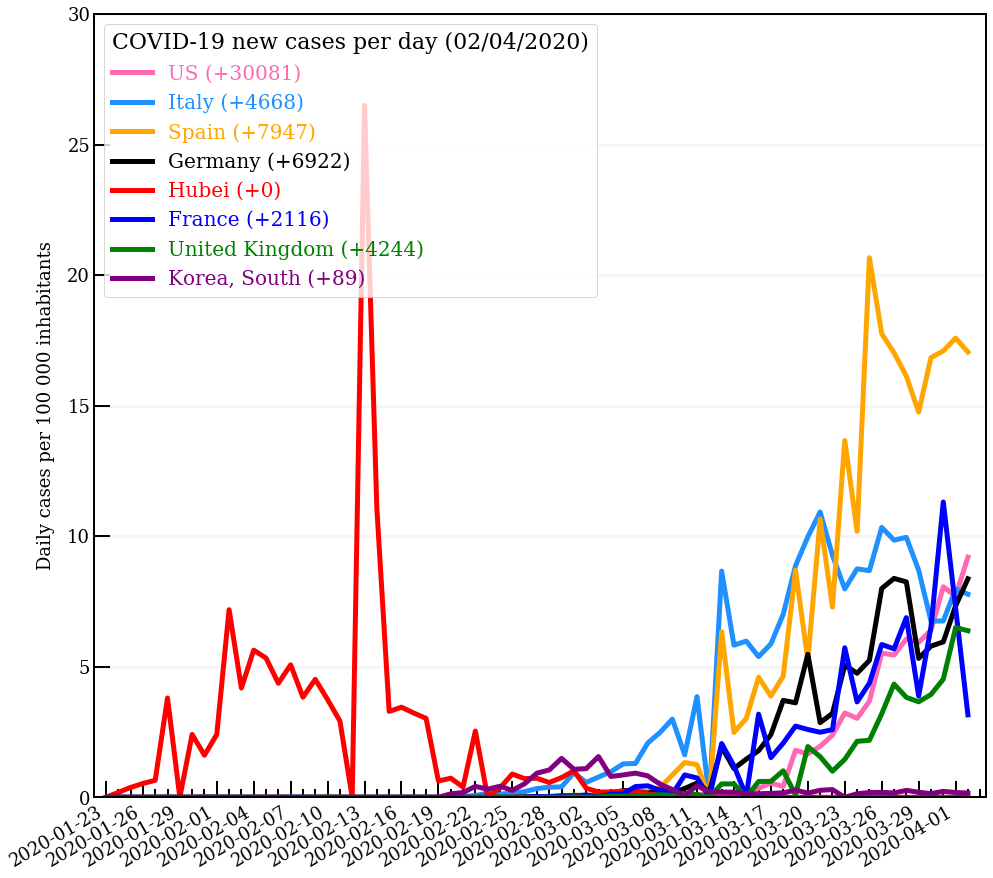

In [582]:
var = 'new_cases'
states = ['Italy', 'Spain', 'United Kingdom', 'Germany', 'France', 'Hubei', 'US', 'Korea, South']
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

#lockdown lines
#lockdown_lines()

# sort by most cases
states = sorted_states(states, 'cases')

# plot curves
for state in states:
    df = data[data.region==state]
    pop = population[state]
    tot = df[var].iat[-1] # total value at current date
    label = state + ' (+%.f)' % tot
    ax.plot(df.date, df[var]/pop*1e5, label=label, color=color[state], lw=5)

# axes
format_dateaxis()
ax.set_xlim([datetime.datetime(2020, 1, 22), today+timedelta(days=0)])
ax.set_ylim(0,30)
plt.ylabel('Daily cases per 100 000 inhabitants')
#plt.yscale('log')
plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = plt.legend(loc='upper left', frameon=True, ncol=1, fontsize=20, title_fontsize=22, 
                 title='COVID-19 new cases per day (%s)' % lastday.strftime('%d/%m/%Y'))
leglabels_style()

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


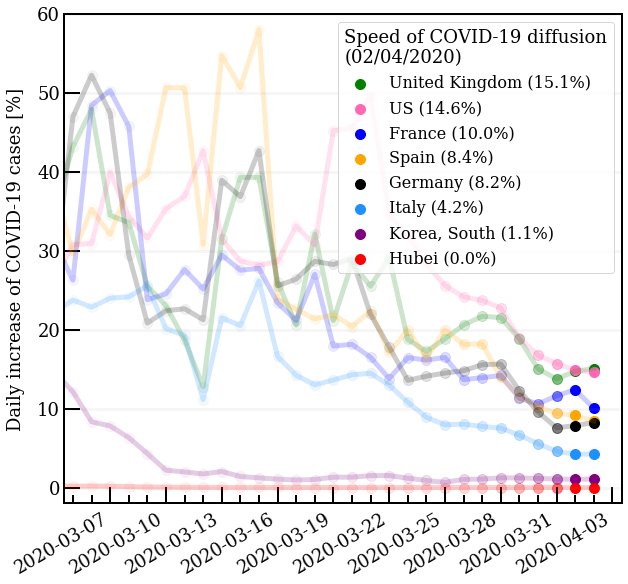

In [583]:
var = 'cases_delta3'
states = ['Italy', 'Spain', 'United Kingdom', 'Germany', 'France', 'Hubei', 'US', 'Korea, South']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

#lockdown lines
#lockdown_lines()

# sort by most cases
states = sorted_states(states, var)

# plot curves
for state in states:
    df = data[data.region==state]    
    ax.plot(df.date, df[var]*100, label='', color=color[state], lw=5, alpha=0.2)

ndays = 30
days = np.arange(1,ndays) 
mk='o'
ms=100
for state in states:
    df = data[data.region==state]
    tot = df[var].iat[-1]*100 # total value at current date
    pop = population[state]
    label = state + ' (%.1f%s)' % (tot,'%')
    ax.scatter(df.date.iat[-1], df[var].iat[-1]*100, label=label, color=color[state], marker=mk, s=ms)
    for day in list(reversed(days)):
        x = df['date'].iat[-1-day] # total value 'day' ago
        y = df[var].iat[-1-day]*100
        alpha = 1/day
        ax.scatter(x,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)

# axes
format_dateaxis()
ax.set_xlim([today-timedelta(days=ndays), today+timedelta(days=0)])
ax.set_ylim(-2,60)
plt.ylabel('Daily increase of COVID-19 cases [%]')
#plt.xscale('log')
plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = plt.legend(loc=0, frameon=True, ncol=1,
                 title='Speed of COVID-19 diffusion\n(%s)' % lastday.strftime('%d/%m/%Y'))
leglabels_style()

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


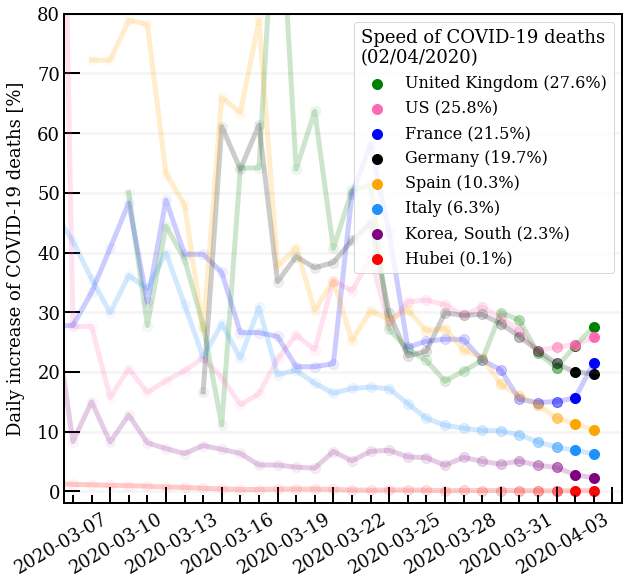

In [584]:
var = 'deaths_delta3'
states = ['Italy', 'Spain', 'United Kingdom', 'Germany', 'France', 'Hubei', 'US', 'Korea, South']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

#lockdown lines
#lockdown_lines()

# sort by most cases
states = sorted_states(states, var)

# plot curves
for state in states:
    df = data[data.region==state]    
    ax.plot(df.date, df[var]*100, label='', color=color[state], lw=5, alpha=0.2)

ndays = 30
days = np.arange(1,ndays) 
mk='o'
ms=100
for state in states:
    df = data[data.region==state]
    tot = df[var].iat[-1]*100 # total value at current date
    pop = population[state]
    label = state + ' (%.1f%s)' % (tot,'%')
    ax.scatter(df.date.iat[-1], df[var].iat[-1]*100, label=label, color=color[state], marker=mk, s=ms)
    for day in list(reversed(days)):
        x = df['date'].iat[-1-day] # total value 'day' ago
        y = df[var].iat[-1-day]*100
        alpha = 1/day
        ax.scatter(x,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)

# axes
format_dateaxis()
ax.set_xlim([today-timedelta(days=ndays), today+timedelta(days=0)])
ax.set_ylim(-2,80)
plt.ylabel('Daily increase of COVID-19 deaths [%]')
#plt.xscale('log')
plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = plt.legend(loc=0, frameon=True, ncol=1, 
                 title='Speed of COVID-19 deaths\n(%s)' % lastday.strftime('%d/%m/%Y'))
leglabels_style()

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


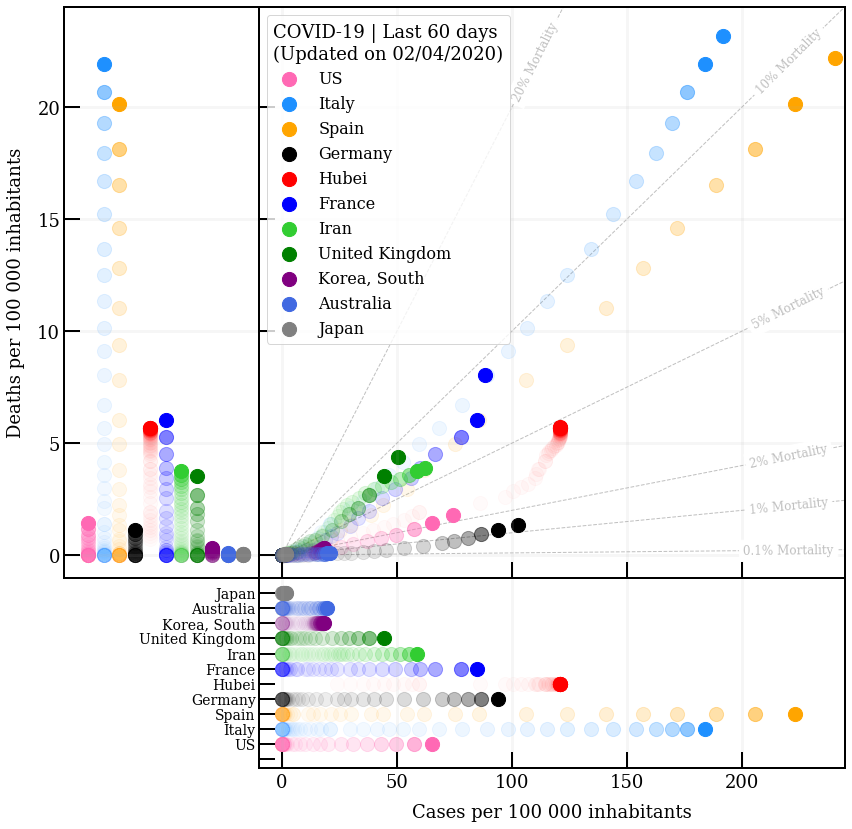

In [585]:
# Create some normally distributed data
varx = 'cases'
vary = 'deaths'
states = ['Italy', 'Spain', 'United Kingdom', 'Germany', 'France', 'Hubei', 'US', 'Korea, South', 'Japan', 'Australia', 'Iran']
states = sorted_states(states, 'cases')

# Set up the axes with gridspec
fig = plt.figure(figsize=(14,14))
grid = plt.GridSpec(4, 4, hspace=0., wspace=0.)
ax = fig.add_subplot(grid[:-1, 1:])
y_ax = fig.add_subplot(grid[:-1, 0], xticks=[], sharey=ax)
x_ax = fig.add_subplot(grid[-1, 1:], sharex=ax)
x_ax.tick_params(axis='y', which='major', labelsize=14)

# axes
xmax = 245
yratio = 0.1
ax.set_ylim(-10*yratio,xmax*yratio)
ax.set_xlim(-10,xmax)
y_ax.set_ylabel('Deaths per 100 000 inhabitants')
x_ax.set_xlabel('Cases per 100 000 inhabitants')

# mortality guidelines
color_guide = 'silver'
m = 2.
ax.plot((0,10*xmax), (0,10*yratio*m*xmax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*yratio*xmax, '20% Mortality', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w')
m = 1.
ax.plot((0,10*xmax), (0,10*yratio*m*xmax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*yratio*xmax, '10% Mortality', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w')
m = 0.2
ax.plot((0,10*xmax), (0,10*yratio*m*xmax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*yratio*m*xmax, '2% Mortality', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w')
m = 0.5
ax.plot((0,10*xmax), (0,10*yratio*m*xmax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*yratio*m*xmax, '5% Mortality', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w')
m = 0.1
ax.plot((0,10*xmax), (0,10*yratio*m*xmax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*yratio*m*xmax, '1% Mortality', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w')
m = 0.01
ax.plot((0,10*xmax), (0,10*yratio*m*xmax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*yratio*m*xmax, '0.1% Mortality', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w')


# plot curves
ndays = 60
days = np.arange(1,ndays)
mk = 'o'
ms=200

#dummy points
x_ax.scatter(0,'',label='', color='w', marker=mk, s=ms, alpha=alpha)
y_ax.scatter('',0,label='', color='w', marker=mk, s=ms, alpha=alpha)

for i,state in enumerate(states):
    df = data[data.region==state]
    pop = population[state]
    ax.scatter(df[varx].iat[-1]/pop*1e5, df[vary].iat[-1]/pop*1e5, label=state, color=color[state], marker=mk, s=ms)
    for day in list(reversed(days)):
        x = df[varx].iat[-1-day]/pop*1e5 # total value 'day' ago
        y = df[vary].iat[-1-day]/pop*1e5
        alpha = 1/day
        ax.scatter(x,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)

        x_ax.scatter(x,state,label='', color=color[state], marker=mk, s=ms, alpha=alpha)
        y_ax.scatter(state,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)
        


ax.grid(axis='x', linewidth=3, alpha=0.1, which='both')
x_ax.grid(axis='x', linewidth=3, alpha=0.1, which='both')
ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')
y_ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = ax.legend(loc='upper left', frameon=True, ncol=1, 
                 title='COVID-19 | Last %d days\n(Updated on %s)' % (ndays, lastday.strftime('%d/%m/%Y')))
leglabels_style()

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


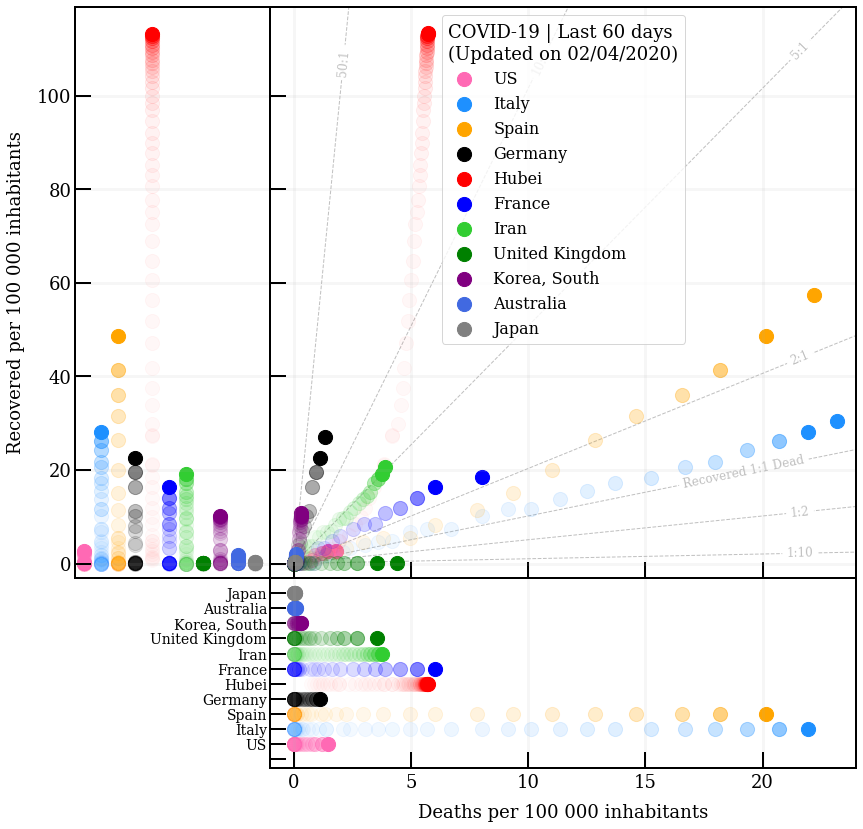

In [586]:
varx = 'deaths'
vary = 'recovered'
states = ['Italy', 'Spain', 'United Kingdom', 'Germany', 'France', 'Hubei', 'US', 'Korea, South', 'Japan', 'Australia', 'Iran']
#states = population.keys()
# sort by most cases
states = sorted_states(states, 'cases')

fig = plt.figure(figsize=(14,14))
grid = plt.GridSpec(4, 4, hspace=0., wspace=0.)
ax = fig.add_subplot(grid[:-1, 1:])
y_ax = fig.add_subplot(grid[:-1, 0], xticks=[], sharey=ax)
x_ax = fig.add_subplot(grid[-1, 1:], sharex=ax)
x_ax.tick_params(axis='y', which='major', labelsize=14)

# axes
xmin = -1
xmax = 24
ymin = -3
ymax = 119
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
y_ax.set_ylabel('Recovered per 100 000 inhabitants')
x_ax.set_xlabel('Deaths per 100 000 inhabitants')

# mortality guidelines
color_guide='silver'
m = 50 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*ymax, '50:1', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 10 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*ymax, '10:1', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 1 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.8*xmax, 0.8*m*ymax, 'Recovered 1:1 Dead', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 2 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '2:1', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 5 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '5:1', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.5 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '1:2', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.1 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '1:10', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)


# plot curves
ndays = 60
days = np.arange(1,ndays)
mk = 'o'
ms=200

#dummy points
x_ax.scatter(0,'',label='', color='w', marker=mk, s=ms, alpha=alpha)
y_ax.scatter('',0,label='', color='w', marker=mk, s=ms, alpha=alpha)

for i,state in enumerate(states):
    df = data[data.region==state]
    pop = population[state]
    ax.scatter(df[varx].iat[-1]/pop*1e5, df[vary].iat[-1]/pop*1e5, label=state, color=color[state], marker=mk, s=ms)
    for day in list(reversed(days)):
        x = df[varx].iat[-1-day]/pop*1e5 # total value 'day' ago
        y = df[vary].iat[-1-day]/pop*1e5
        alpha = 1/day
        ax.scatter(x,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)

        x_ax.scatter(x,state,label='', color=color[state], marker=mk, s=ms, alpha=alpha)
        y_ax.scatter(i,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)
        
ax.grid(axis='x', linewidth=3, alpha=0.1, which='both')
x_ax.grid(axis='x', linewidth=3, alpha=0.1, which='both')
ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')
y_ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = ax.legend(loc=0, frameon=True, ncol=1, 
                 title='COVID-19 | Last %d days\n(Updated on %s)' % (ndays, lastday.strftime('%d/%m/%Y')))
leglabels_style()

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


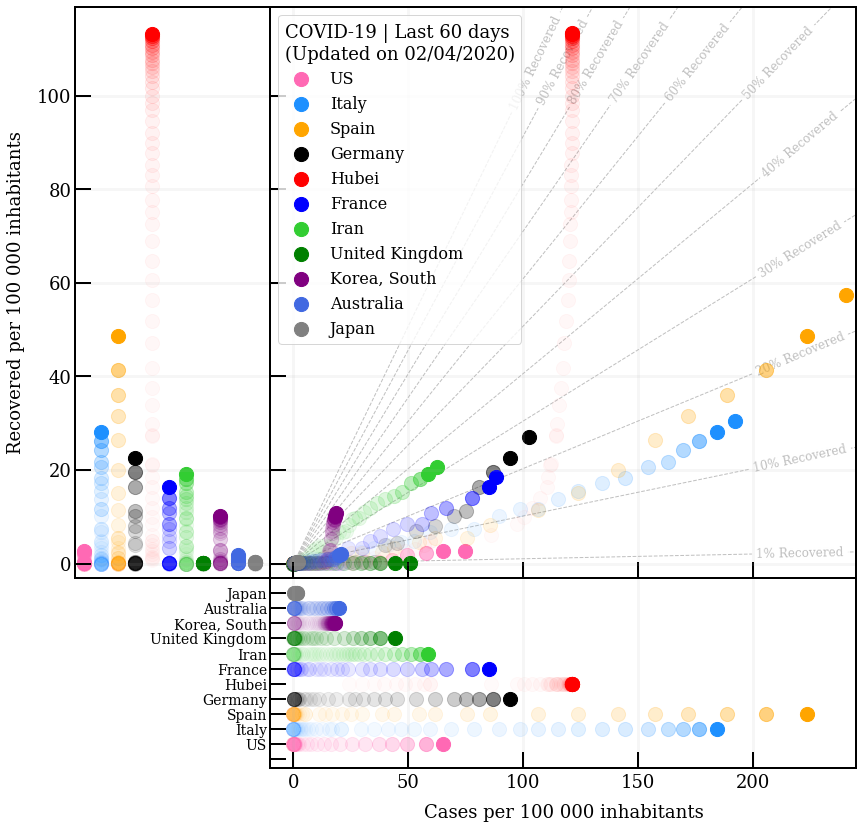

In [587]:
varx = 'cases'
vary = 'recovered'
states = ['Italy', 'Spain', 'United Kingdom', 'Germany', 'France', 'Hubei', 'US', 'Korea, South', 'Japan', 'Australia', 'Iran']
#states = population.keys()
# sort by most cases
states = sorted_states(states, 'cases')

fig = plt.figure(figsize=(14,14))
grid = plt.GridSpec(4, 4, hspace=0., wspace=0.)
ax = fig.add_subplot(grid[:-1, 1:])
y_ax = fig.add_subplot(grid[:-1, 0], xticks=[], sharey=ax)
x_ax = fig.add_subplot(grid[-1, 1:], sharex=ax)
x_ax.tick_params(axis='y', which='major', labelsize=14)

# axes
xmin = -10
xmax = 245
ymin = -3
ymax = 119
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
y_ax.set_ylabel('Recovered per 100 000 inhabitants')
x_ax.set_xlabel('Cases per 100 000 inhabitants')

# mortality guidelines
color_guide='silver'
m = 1 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*ymax, '100% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.8 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*ymax, '80% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.9 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*ymax, '90% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)

m = 0.7 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*ymax, '70% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.6 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*ymax, '60% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)

m = 0.5 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax/m, 0.9*ymax, '50% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.4 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '40% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.3 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '30% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.2 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '20% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)

m = 0.1 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '10% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)
m = 0.01 * (xmax-xmin)/(ymax-ymin)
ax.plot((0,10*xmax), (0,10*m*ymax), ls='--', lw=1, color=color_guide, zorder=-100)
ax.text(0.9*xmax, 0.9*ymax*m, '1% Recovered', color=color_guide, fontsize=12, rotation=np.rad2deg(np.arctan(m)), ha='center', va='center', backgroundcolor='w', zorder=-100)


# plot curves
ndays = 60
days = np.arange(1,ndays)
mk = 'o'
ms=200

#dummy points
x_ax.scatter(0,'',label='', color='w', marker=mk, s=ms, alpha=alpha)
y_ax.scatter('',0,label='', color='w', marker=mk, s=ms, alpha=alpha)

for i,state in enumerate(states):
    df = data[data.region==state]
    pop = population[state]
    ax.scatter(df[varx].iat[-1]/pop*1e5, df[vary].iat[-1]/pop*1e5, label=state, color=color[state], marker=mk, s=ms)
    for day in list(reversed(days)):
        x = df[varx].iat[-1-day]/pop*1e5 # total value 'day' ago
        y = df[vary].iat[-1-day]/pop*1e5
        alpha = 1/day
        ax.scatter(x,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)

        x_ax.scatter(x,state,label='', color=color[state], marker=mk, s=ms, alpha=alpha)
        y_ax.scatter(i,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)
        
ax.grid(axis='x', linewidth=3, alpha=0.1, which='both')
x_ax.grid(axis='x', linewidth=3, alpha=0.1, which='both')
ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')
y_ax.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = ax.legend(loc=0, frameon=True, ncol=1, 
                 title='COVID-19 | Last %d days\n(Updated on %s)' % (ndays, lastday.strftime('%d/%m/%Y')))
leglabels_style()

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


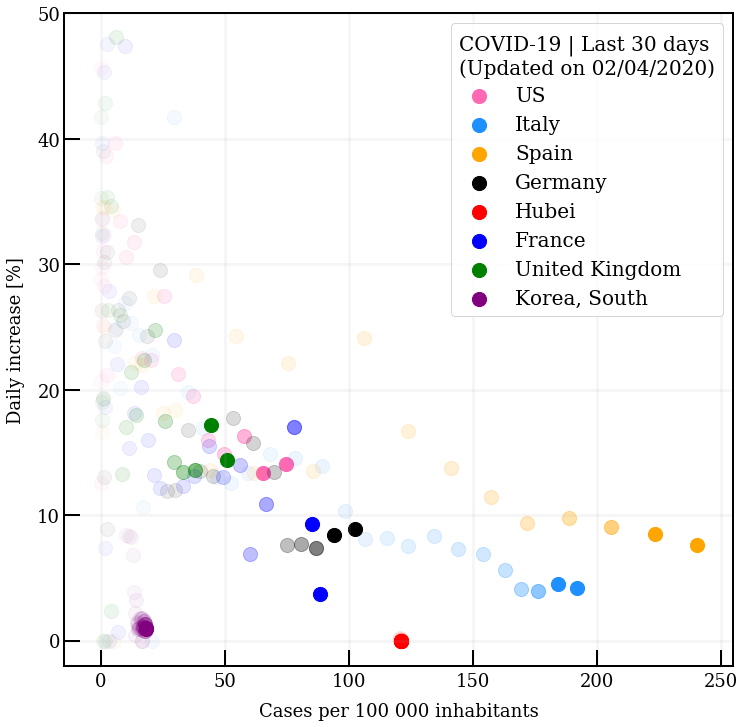

In [588]:
varx = 'cases'
vary = 'cases_delta1'
states = ['Italy', 'Spain', 'United Kingdom', 'Germany', 'France', 'Hubei', 'US', 'Korea, South']
#states = population.keys()
# sort by most cases
states = sorted_states(states, 'cases')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# plot curves
ndays = 30
days = np.arange(1,ndays)
mk = 'o'
ms=200
for state in states:
    df = data[data.region==state]
    pop = population[state]
    ax.scatter(df[varx].iat[-1]/pop*1e5, df[vary].iat[-1]*100, label=state, color=color[state], marker=mk, s=ms)
    for day in list(reversed(days)):
        x = df[varx].iat[-1-day]/pop*1e5 # total value 'day' ago
        y = df[vary].iat[-1-day]*100
        alpha = 1/day
        ax.scatter(x,y,label='', color=color[state], marker=mk, s=ms, alpha=alpha)

# axes
xmax = 220
ax.set_ylim(-2,50)
#ax.set_xlim(-10,xmax)

plt.ylabel('Daily increase [%]')
plt.xlabel('Cases per 100 000 inhabitants')
plt.grid(axis='x', linewidth=3, alpha=0.1, which='both')
plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')

#legend
leg = plt.legend(loc=0, frameon=True, ncol=1, fontsize=20, title_fontsize=20, 
                 title='COVID-19 | Last %d days\n(Updated on %s)' % (ndays, lastday.strftime('%d/%m/%Y')))
leglabels_style()

plt.show()